# A 1-D Groundwater Finite Difference Example
## Lejo Flores

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K = 2.0

xL = 0.0
xR = 100.0
dx = 1

Nx = (xR - xL)/dx + 1

ti = 0.0
tf = 500.0
dt = 0.2

Nt = (tf - ti)/dt + 1

hi = 8.0
hf = 4.0

hL = np.linspace(hi,hi,num=Nt,endpoint=True)
hR = np.linspace(hi,hf,num=Nt,endpoint=True)

x = np.linspace(xL,xR,num=Nx,endpoint=True)

h0 = hi*np.ones(shape=(int(Nx),1))

## Checking for model stability


In [2]:
alpha = K*dt/dx**2
print("alpha = ",alpha)
print("dt = ",dt)
print("dx = ",dx)
if alpha >= 0.5:
    raise Exception("Stability criteria error! Either decrease dt or increase dx!")

alpha =  0.4
dt =  0.2
dx =  1


## Running the model

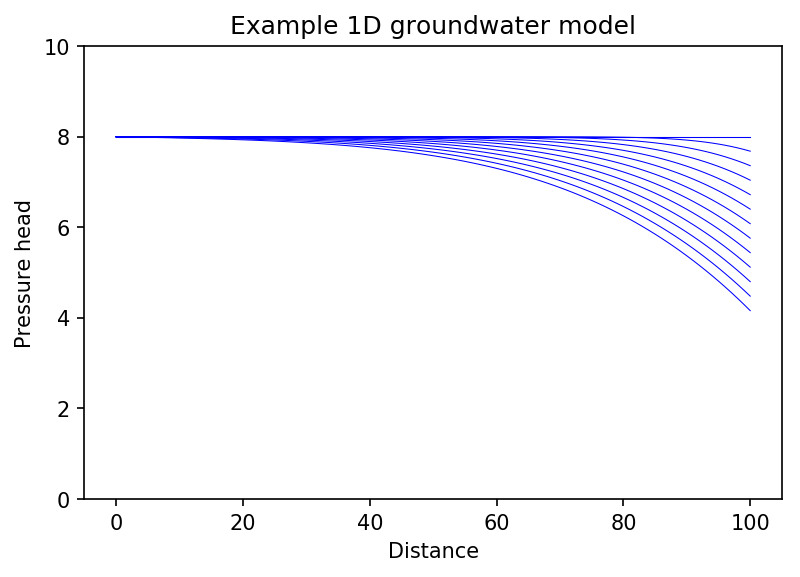

In [3]:
H = np.zeros(shape=(int(Nt),int(Nx)))

plt.figure(figsize=(6,4), dpi=150)
plt.xlabel("Distance")
plt.ylabel("Pressure head")
plt.title("Example 1D groundwater model")
plt.ylim(0.0,hi+2.0)
plt.plot(x,h0,'b',linewidth=0.5)

for i in range(0,int(Nt)):
    for j in range(0,int(Nx)):
        if j == 0:
            H[i,j] = hL[i]
        elif j == (Nx-1):
            H[i,j] = hR[i]
        else:
            if i == 0:
                H[i,j] = h0[j] + alpha*(h0[j-1] - 2*h0[j] + h0[j+1])
            else:
                H[i,j] = H[i-1,j] + alpha*(H[i-1,j-1] - 2*H[i-1,j] + H[i-1,j+1])
    if (i % 200) == 0:
        plt.plot(x,H[i,:],'b',linewidth=0.5)

plt.show()

## A slightly more complicated model

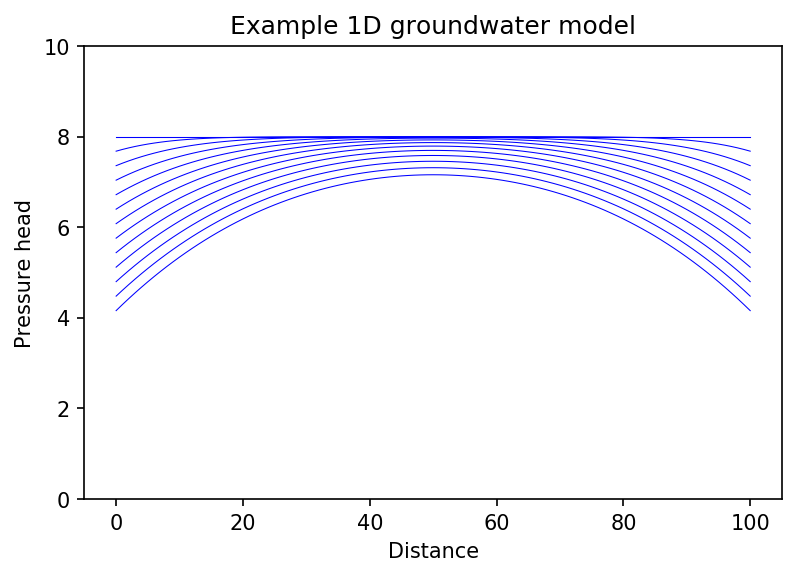

In [4]:
hL = np.linspace(hi,hf,num=Nt,endpoint=True)
hR = np.linspace(hi,hf,num=Nt,endpoint=True)

H2 = np.zeros(shape=(int(Nt),int(Nx)))

plt.figure(figsize=(6,4), dpi=150)
plt.xlabel("Distance")
plt.ylabel("Pressure head")
plt.title("Example 1D groundwater model")
plt.ylim(0.0,hi+2.0)
plt.plot(x,h0,'b',linewidth=0.5)

for i in range(0,int(Nt)):
    for j in range(0,int(Nx)):
        if j == 0:
            H2[i,j] = hL[i]
        elif j == (Nx-1):
            H2[i,j] = hR[i]
        else:
            if i == 0:
                H2[i,j] = h0[j] + alpha*(h0[j-1] - 2*h0[j] + h0[j+1])
            else:
                H2[i,j] = H2[i-1,j] + alpha*(H2[i-1,j-1] - 2*H2[i-1,j] + H2[i-1,j+1])
    if (i % 200) == 0:
        plt.plot(x,H2[i,:],'b',linewidth=0.5)

plt.show()